In [5]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

def load_data():
    X = np.load("../data/digitX.npy")
    y = np.load("../data/digity.npy")
    return X, y

def softmax(z):
    ez = np.exp(z)
    a = ez/np.sum(ez)
    return a

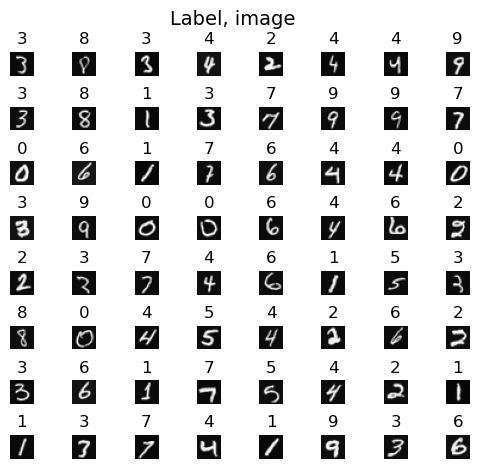

In [6]:
# X is a matrix with 5000 rows (samples) 
# and 400 columns (20*20 pixels, features)

# y is a vector with 5000 entries (labels)

X, y = load_data()

m, n = X.shape

fig, axes = plt.subplots(8,8, figsize=(5,5))
fig.tight_layout(pad=0.13,rect=[0, 0.03, 1, 0.91]) #[left, bottom, right, top]

#fig.tight_layout(pad=0.5)
fig.canvas.toolbar_visible = False
fig.canvas.header_visible = False
fig.canvas.footer_visible = False

for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)
    
    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = X[random_index].reshape((20,20)).T
    
    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')
    
    # Display the label above the image
    ax.set_title(y[random_index,0])
    ax.set_axis_off()
    fig.suptitle("Label, image", fontsize=14)


In [11]:
# Architecture: x -> ReLU 25 units -> ReLU 15 units -> 
# linaer 10 units -> softmax applied separately -> probabilities

# Before proceeding, explain what are the demensions of parameters

tf.random.set_seed(1234)

model = tf.keras.models.Sequential([
    tf.keras.layers.InputLayer((400,)), #specify input shape
    tf.keras.layers.Dense(25, activation="relu"),
    tf.keras.layers.Dense(15, activation="relu"),
    tf.keras.layers.Dense(10, activation="linear")
], name = "my_model")

model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
    optimizer=tf.keras.optimizers.Adam(0.001)
)

model.summary()

model.fit(X, y, epochs=40)

# What does Epoch 1/100 157/157 mean?
# For efficiency the training set is broken into "batches" of size 32
# As there are 5000 samples total, there are 5000/32 = 157 batches

Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 25)                10025     
                                                                 
 dense_7 (Dense)             (None, 15)                390       
                                                                 
 dense_8 (Dense)             (None, 10)                160       
                                                                 
Total params: 10,575
Trainable params: 10,575
Non-trainable params: 0
_________________________________________________________________
Epoch 1/40
  8/157 [>.............................] - ETA: 1s - loss: 2.2688 

2024-07-12 15:45:58.128041: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


157/157 [==============================] - 1s 6ms/step - loss: 1.4902
Epoch 2/40
157/157 [==============================] - 1s 5ms/step - loss: 0.5924
Epoch 3/40
157/157 [==============================] - 1s 5ms/step - loss: 0.4061
Epoch 4/40
157/157 [==============================] - 1s 5ms/step - loss: 0.3311
Epoch 5/40
157/157 [==============================] - 1s 5ms/step - loss: 0.2896
Epoch 6/40
157/157 [==============================] - 1s 5ms/step - loss: 0.2599
Epoch 7/40
157/157 [==============================] - 1s 5ms/step - loss: 0.2348
Epoch 8/40
157/157 [==============================] - 1s 6ms/step - loss: 0.2163
Epoch 9/40
157/157 [==============================] - 1s 5ms/step - loss: 0.2033
Epoch 10/40
157/157 [==============================] - 1s 5ms/step - loss: 0.1841
Epoch 11/40
157/157 [==============================] - 1s 5ms/step - loss: 0.1727
Epoch 12/40
157/157 [==============================] - 1s 6ms/step - loss: 0.1644
Epoch 13/40
157/157 [===============

In [13]:
image_of_two = X[1015] # We know that it is a 2
prediction = model.predict(image_of_two.reshape(1,400))
print(f"Output for different classes (RAW): {prediction}")
print(f"Largest prediction index: {np.argmax(prediction)}")

1/1 [==============================] - 0s 50ms/step
Output for different classes (RAW): [[ -5.872994     4.1907673    8.139721     0.63936925 -10.163021
   -2.7975428   -4.182426     5.73428     -3.048511    -4.9062276 ]]
Largest prediction index: 2


In [15]:
# For selection argmax is sufficient. But we need softmax for probabilities

prediction_p = tf.nn.softmax(prediction)
print(f"Probability for different classes (PROB): {prediction_p}")
print(f"Sum of predictions: {np.sum(prediction_p)}")

yhat = np.argmax(prediction_p)
print(f"Predicted label: {yhat}")

Probability for different classes (PROB): [[7.3959887e-07 1.7363291e-02 9.0082580e-01 4.9805734e-04 1.0135867e-08
  1.6019450e-05 4.0105151e-06 8.1277654e-02 1.2463877e-05 1.9447220e-06]]
Sum of predictions: 1.0
Predicted label: 2


1/1 [==============================] - 0s 12ms/step


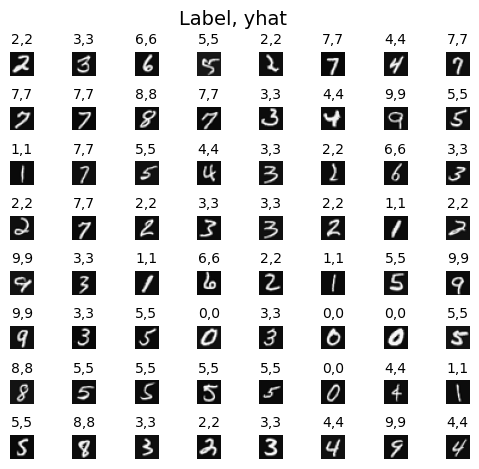

In [16]:
# Finally let's compare a selection of images with their predictions

m, n = X.shape

fig, axes = plt.subplots(8,8, figsize=(5,5))
fig.tight_layout(pad=0.13,rect=[0, 0.03, 1, 0.91]) #[left, bottom, right, top]
fig.canvas.toolbar_visible = False
fig.canvas.header_visible = False
fig.canvas.footer_visible = False
for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)
    
    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = X[random_index].reshape((20,20)).T
    
    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')
    
    # Predict using the Neural Network
    prediction = model.predict(X[random_index].reshape(1,400))
    prediction_p = tf.nn.softmax(prediction)
    yhat = np.argmax(prediction_p)
    
    # Display the label above the image
    ax.set_title(f"{y[random_index,0]},{yhat}",fontsize=10)
    ax.set_axis_off()
fig.suptitle("Label, yhat", fontsize=14)
plt.show()